## Execution of various methods

#### LSTM

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/10
782/782 [==============================] - 419s 527ms/step - loss: 0.4364 - accuracy: 0.7910 - val_loss: 0.3488 - val_accuracy: 0.8435
Epoch 2/10
782/782 [==============================] - 385s 492ms/step - loss: 0.2606 - accuracy: 0.8952 - val_loss: 0.3831 - val_accuracy: 0.8335
Epoch 3/10
782/782 [==============================] - 387s 495ms/step - loss: 0.1701 - accuracy: 0.9339 - val_loss: 0.5085 - val_accuracy: 0.8256
Epoch 4/10
782/782 [==============================] - 405s 518ms/step - loss: 0.1069 - accuracy: 0.9608 - val_loss: 0.5486 - val_accuracy: 0.8264
Epoch 5/10
782/782 [==============================] - 407s 520ms/step - loss: 0.0793 - accuracy: 0.9719 - val_loss: 0.6531 - val_accuracy: 0.8191
Epoch 6/10
782/782 [==================

### GRU

In [2]:

from keras.layers import GRU


print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/10
782/782 [==============================] - 364s 462ms/step - loss: 0.4393 - accuracy: 0.7911 - val_loss: 0.3452 - val_accuracy: 0.8498
Epoch 2/10
782/782 [==============================] - 355s 454ms/step - loss: 0.2414 - accuracy: 0.9058 - val_loss: 0.3583 - val_accuracy: 0.8482
Epoch 3/10
782/782 [==============================] - 351s 449ms/step - loss: 0.1386 - accuracy: 0.9485 - val_loss: 0.4246 - val_accuracy: 0.8329
Epoch 4/10
782/782 [==============================] - 348s 445ms/step - loss: 0.0769 - accuracy: 0.9728 - val_loss: 0.5460 - val_accuracy: 0.8289
Epoch 5/10
782/782 [==============================] - 349s 446ms/step - loss: 0.0420 - accuracy: 0.9864 - val_loss: 0.6914 - val_accuracy: 0.8261
Epoch 6/10
782/782 [==============================] - 347s 444ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.7668 - val_accuracy: 0.8237
Epoch 7/10
782/782 [==============================] - 348s 445ms/step - loss: 0.0182 - accuracy: 0.9

### SimpleRNN

In [3]:
from keras.layers import SimpleRNN
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/10
782/782 [==============================] - 144s 182ms/step - loss: 0.6670 - accuracy: 0.5742 - val_loss: 0.5648 - val_accuracy: 0.7074
Epoch 2/10
782/782 [==============================] - 143s 184ms/step - loss: 0.5656 - accuracy: 0.7038 - val_loss: 0.5119 - val_accuracy: 0.7569
Epoch 3/10
782/782 [==============================] - 138s 177ms/step - loss: 0.4844 - accuracy: 0.7679 - val_loss: 0.6481 - val_accuracy: 0.7277
Epoch 4/10
782/782 [==============================] - 139s 177ms/step - loss: 0.4024 - accuracy: 0.8268 - val_loss: 0.6983 - val_accuracy: 0.7352
Epoch 5/10
782/782 [==============================] - 138s 176ms/step - loss: 0.3663 - accuracy: 0.8452 - val_loss: 0.5192 - val_accuracy: 0.7465
Epoch 6/10
782/782 [==============================] - 140s 180ms/step - loss: 0.3300 - accuracy: 0.8619 - val_loss: 0.5707 - val_accuracy: 0.7889
Epoch 7/10
782/782 [==============================] - 142s 181ms/step - loss: 0.2725 - accuracy: 0.8

### ConvLSTM2D

In [ ]:
import tensorflow
dir(tensorflow.keras.layers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 1/2
95/95 [==============================] - 149s 1s/step - loss: 0.7890 - val_loss: 0.6919
Epoch 2/2
95/95 [==============================] - 140s 1s/step - loss: 0.7469 - val_loss: 0.6769


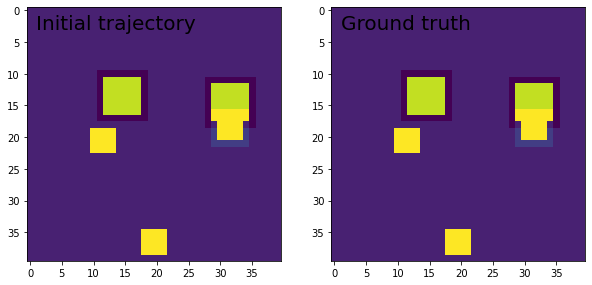

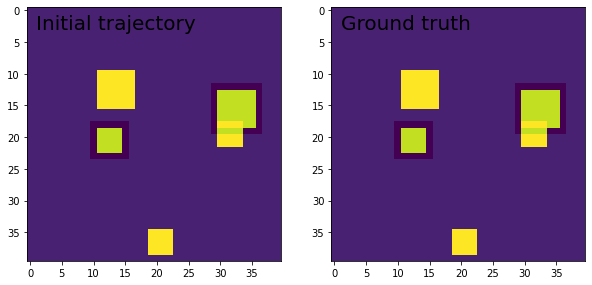

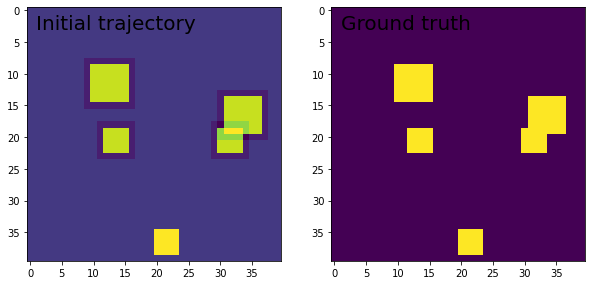

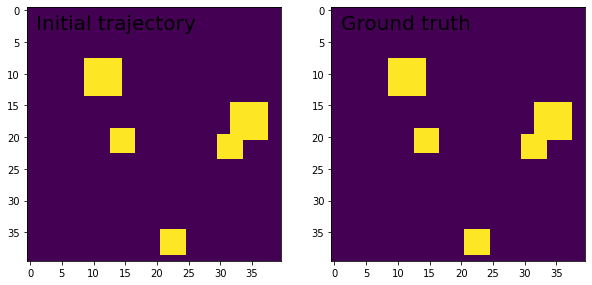

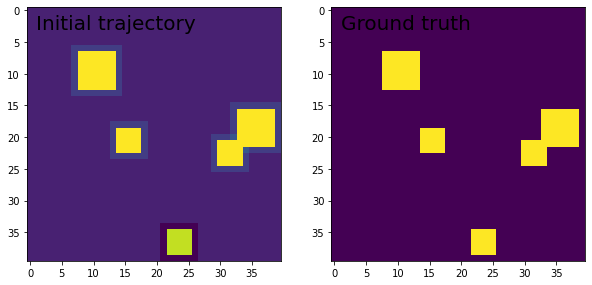

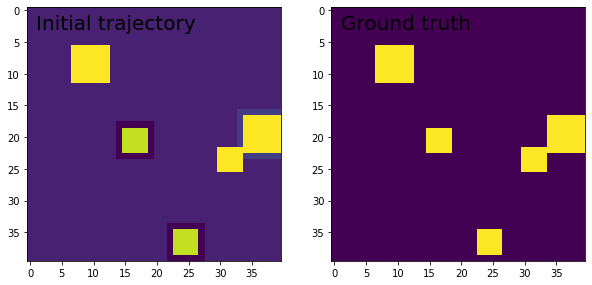

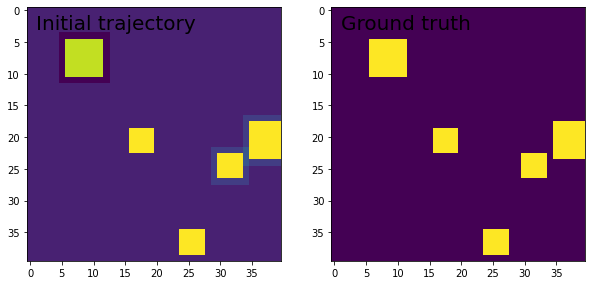

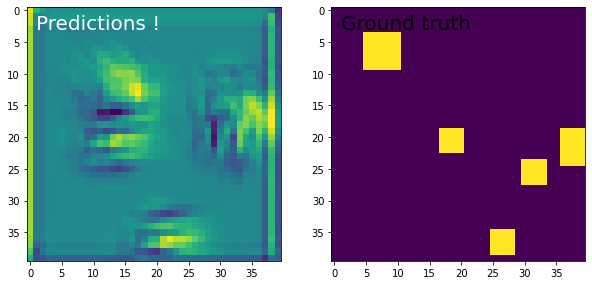

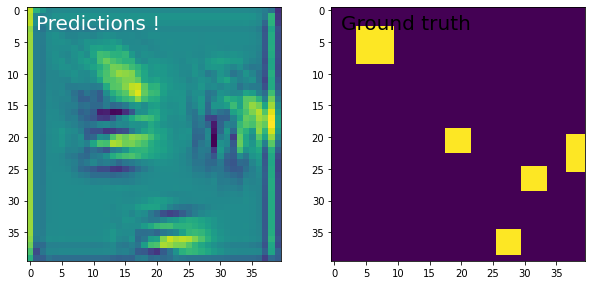

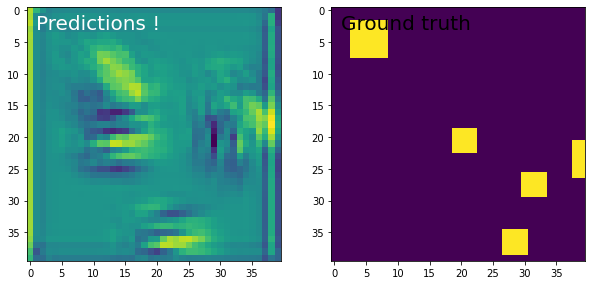

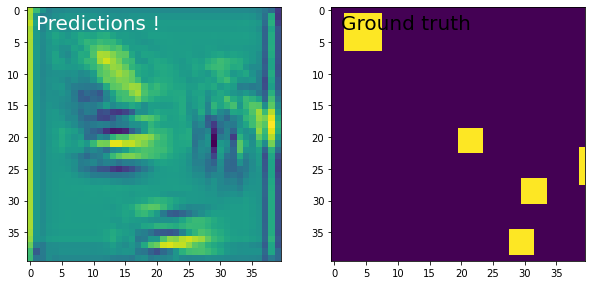

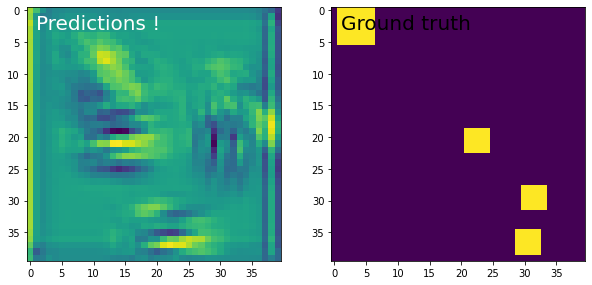

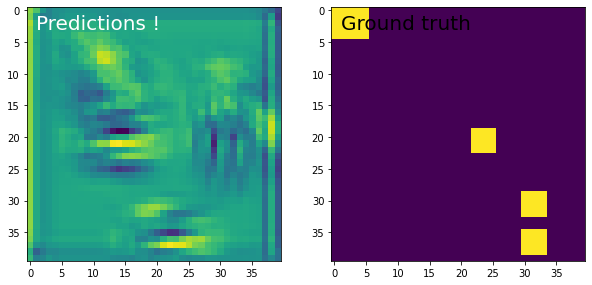

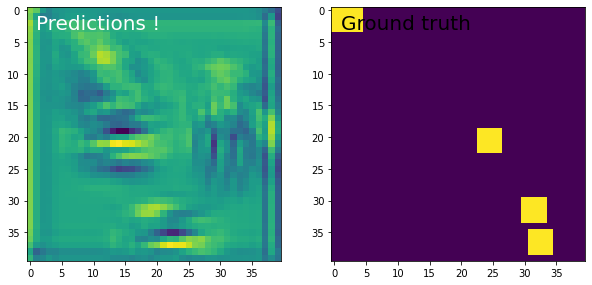

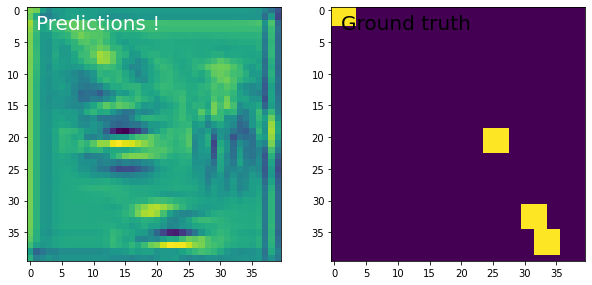

In [14]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## Comparison between multiple data sets

In [56]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [57]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32
(x_train, y_train), (x_test, y_test) =reuters.load_data(
    path='reuters.npz', num_words=max_features, skip_top=0, maxlen=None,
    test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3
)


In [58]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [59]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [61]:
y_train.shape

(8982, 46)

In [ ]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
281/281 [==============================] - 84s 287ms/step - loss: 0.1022 - accuracy: 0.3240 - val_loss: 0.0724 - val_accuracy: 0.3620
Epoch 2/5
281/281 [==============================] - 79s 280ms/step - loss: 0.0722 - accuracy: 0.3501 - val_loss: 0.0724 - val_accuracy: 0.3620
Epoch 3/5
281/281 [==============================] - 79s 282ms/step - loss: 0.0722 - accuracy: 0.3517 - val_loss: 0.0724 - val_accuracy: 0.3620
Epoch 4/5
104/281 [==========>...................] - ETA: 49s - loss: 0.0712 - accuracy: 0.3609

## Explanation of other classes

- RNN:  is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence
- SimpleRNNCell:Cell class for SimpleRNN which is a fully-connected RNN where the output from previous timestep is to be fed to next timestep.
- GRUCell : Cell class for GRU which is  a gating mechanism in recurrent neural networks
- LSTMCell :  Cell class for LSTM which is an artificial recurrent neural network (RNN) architecture used in the field of deep learning
- StackedRNNCells: Wrapper allowing a stack of RNN cells to behave as a single cell
- CuDNNGRU: Fast GRU implementation backed by cuDNN
- CuDNNLSTM: Fast LSTM implementation backed by cuDNN